In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from collections import OrderedDict, defaultdict
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

# Multiple Regression of House Prices

Kaggle Account: [mkivenson](https://www.kaggle.com/mkivenson/competitions)

Score: 0.13507

## Load Train and Test Data

Loan the train and test datasets, saved from Kaggle to Github.

In [2]:
#data
train = pd.read_csv("https://raw.githubusercontent.com/mkivenson/Computational-Mathematics/master/Final%20Project/train.csv")
train_copy = pd.read_csv("https://raw.githubusercontent.com/mkivenson/Computational-Mathematics/master/Final%20Project/train.csv")

test = pd.read_csv("https://raw.githubusercontent.com/mkivenson/Computational-Mathematics/master/Final%20Project/test.csv")

The following is a summary of each of the features of the training dataset for house prices.

In [3]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

## Data Preprocessing
### Columns With NaN

The following columns have columns with NaN values.

In [4]:
train.loc[:, train.isna().any()]

LotFrontage Alley MasVnrType  MasVnrArea BsmtQual BsmtCond BsmtExposure  \
0            65.0   NaN    BrkFace       196.0       Gd       TA           No   
1            80.0   NaN       None         0.0       Gd       TA           Gd   
2            68.0   NaN    BrkFace       162.0       Gd       TA           Mn   
3            60.0   NaN       None         0.0       TA       Gd           No   
4            84.0   NaN    BrkFace       350.0       Gd       TA           Av   
...           ...   ...        ...         ...      ...      ...          ...   
1455         62.0   NaN       None         0.0       Gd       TA           No   
1456         85.0   NaN      Stone       119.0       Gd       TA           No   
1457         66.0   NaN       None         0.0       TA       Gd           No   
1458         68.0   NaN       None         0.0       TA       TA           Mn   
1459         75.0   NaN       None         0.0       TA       TA           No   

     BsmtFinType1 BsmtFinType2 Electrical FireplaceQu GarageType  GarageYrBlt  \
0             GLQ          Unf      SBrkr         NaN     Attchd       2003.0   
1             ALQ          Unf      SBrkr          TA     Attchd       1976.0   
2             GLQ          Unf      SBrkr          TA     Attchd       2001.0   
3             ALQ          Unf      SBrkr          Gd     Detchd       1998.0   
4             GLQ          Unf      SBrkr          TA     Attchd       2000.0   
...           ...          ...        ...         ...        ...          ...   
1455          Unf          Unf      SBrkr          TA     Attchd       1999.0   
1456          ALQ          Rec      SBrkr          TA     Attchd       1978.0   
1457          GLQ          Unf      SBrkr          Gd     Attchd       1941.0   
1458          GLQ          Rec      FuseA         NaN     Attchd       1950.0   
1459          BLQ          LwQ      SBrkr         NaN     Attchd       1965.0   

     GarageFinish GarageQual GarageCond PoolQC  Fence MiscFeature  
0             RFn         TA         TA    NaN    NaN         NaN  
1             RFn         TA         TA    NaN    NaN         NaN  
2             RFn         TA         TA    NaN    NaN         NaN  
3             Unf         TA         TA    NaN    NaN         NaN  
4             RFn         TA         TA    NaN    NaN         NaN  
...           ...        ...        ...    ...    ...         ...  
1455          RFn         TA         TA    NaN    NaN         NaN  
1456          Unf         TA         TA    NaN  MnPrv         NaN  
1457          RFn         TA         TA    NaN  GdPrv        Shed  
1458          Unf         TA         TA    NaN    NaN         NaN  
1459          Fin         TA         TA    NaN    NaN         NaN  

[1460 rows x 19 columns]

To handle the NaN values, I filled them with either the mean value of a column, 'None', or 0. I determined how to fill NaN values using the data dictionary provided on Kaggle.

In [5]:
def removena(data):
    #LotFrontage: Linear feet of street connected to property. Fill with mean lot frontage in dataset
    data['LotFrontage'] = data['LotFrontage'].fillna(np.mean(data['LotFrontage']))

    #Alley: Type of alley access. Fill NaN with None (assume no alley access)
    data['Alley'] = data['Alley'].fillna('None')

    #MasVnrType: Masonry veneer type. Fill NaN with None (assume no veneer)
    data['MasVnrType'] = data['Alley'].fillna('None')

    #MasVnrArea: Masonry veneer area in square feet. Fill NaN with 0 (assume no veneer)
    data['MasVnrArea'] = data['Alley'].fillna(0)

    #BsmtQual: Height of the basement - assume no basement
    data['BsmtQual'] = data['BsmtQual'].fillna('None')

    #BsmtCond: General condition of the basement - assume no basement
    data['BsmtCond'] = data['BsmtCond'].fillna('None')

    #BsmtExposure: Walkout or garden level basement walls - assume no basement
    data['BsmtExposure'] = data['BsmtExposure'].fillna('None')

    #BsmtFinType1: Quality of basement finished area - assume no basement
    data['BsmtFinType1'] = data['BsmtFinType1'].fillna('None')

    #BsmtFinType2: Quality of second finished area (if present) - assume no basement
    data['BsmtFinType2'] = data['BsmtFinType2'].fillna('None')
    
    #BsmtFinSF1
    data['BsmtFinSF1'] = data['BsmtFinSF1'].fillna(0)
    
    #BsmtFinSF2
    data['BsmtFinSF2'] = data['BsmtFinSF2'].fillna(0)
    
    #BsmtUnfSF
    data['BsmtUnfSF'] = data['BsmtUnfSF'].fillna(0)
    
    #TotalBsmtSF
    data['TotalBsmtSF'] = data['TotalBsmtSF'].fillna(0)
    
    #BsmtFullBath
    data['BsmtFullBath'] = data['BsmtFullBath'].fillna(0)
    
    #BsmtHalfBath
    data['BsmtHalfBath'] = data['BsmtHalfBath'].fillna(0)

    #Electrical: Electrical system - only one house with NaN for this field, set to SBrkr (most common)
    data['Electrical'] = data['Electrical'].fillna('SBrkr')

    #FireplaceQu: Fireplace quality - assume no fireplace, set none
    data['FireplaceQu'] = data['FireplaceQu'].fillna('None')

    #GarageType: Garage location - set to None, assume no garage 
    data['GarageType'] = data['GarageType'].fillna('None')

    #GarageYrBlt: Year garage was built - set to None, assume no garage 
    data['GarageYrBlt'] = data['GarageYrBlt'].fillna('None')

    #GarageFinish: Interior finish of the garage - set to None, assume no garage 
    data['GarageFinish'] = data['GarageFinish'].fillna('None')

    #GarageQual: Garage quality - set to None, assume no garage 
    data['GarageQual'] = data['GarageQual'].fillna('None')

    #GarageCond: Garage condition - set to None, assume no garage 
    data['GarageCond'] = data['GarageCond'].fillna('None')
    
    #GarageCars
    data['GarageCars'] = data['GarageCars'].fillna(0)
    
    #GarageArea
    data['GarageArea'] = data['GarageArea'].fillna(0)

    #PoolQC: Pool quality - set to None, assume no pool
    data['PoolQC'] = data['PoolQC'].fillna('None')

    #Fence: Fence quality - set to None, assume no fence
    data['Fence'] = data['Fence'].fillna('None')

    #MiscFeature: Miscellaneous feature not covered in other categories, assume no feature
    data['MiscFeature'] = data['MiscFeature'].fillna('None')
    return data  
train = removena(train)
train_copy = removena(train_copy)

### Encoding

Some of the categorical columns must be encoded to be used for regression. The following columns are categorical.

In [6]:
train.select_dtypes(include = ['object'])

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave  None      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave  None      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave  None      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave  None      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave  None      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...   ...      ...         ...       ...       ...       ...   
1455       RL   Pave  None      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave  None      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave  None      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave  None      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave  None      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1  ... GarageYrBlt GarageFinish GarageQual  \
0         CollgCr       Norm  ...        2003          RFn         TA   
1         Veenker      Feedr  ...        1976          RFn         TA   
2         CollgCr       Norm  ...        2001          RFn         TA   
3         Crawfor       Norm  ...        1998          Unf         TA   
4         NoRidge       Norm  ...        2000          RFn         TA   
...           ...        ...  ...         ...          ...        ...   
1455      Gilbert       Norm  ...        1999          RFn         TA   
1456       NWAmes       Norm  ...        1978          Unf         TA   
1457      Crawfor       Norm  ...        1941          RFn         TA   
1458        NAmes       Norm  ...        1950          Unf         TA   
1459      Edwards       Norm  ...        1965          Fin         TA   

     GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
0            TA          Y   None   None        None       WD        Normal  
1            TA          Y   None   None        None       WD        Normal  
2            TA          Y   None   None        None       WD        Normal  
3            TA          Y   None   None        None       WD       Abnorml  
4            TA          Y   None   None        None       WD        Normal  
...         ...        ...    ...    ...         ...      ...           ...  
1455         TA          Y   None   None        None       WD        Normal  
1456         TA          Y   None  MnPrv        None       WD        Normal  
1457         TA          Y   None  GdPrv        Shed       WD        Normal  
1458         TA          Y   None   None        None       WD        Normal  
1459         TA          Y   None   None        None       WD        Normal  

[1460 rows x 45 columns]

Instead of using one hot encoder or label encoder, I created a custom dictionary for encoding. The dictionary for mapping categorical values to integers was created by sorting values in descending mean values.

In [7]:
def encode_train():
    # integer encode
    label_encoder = LabelEncoder()
    for col in train.select_dtypes(include = ['object']):
        
        #label_encoder.fit(list(code))
        #data[col] = label_encoder.transform(data[col].astype(str))
        
        #instead of using label encoder, which codes strings alphabetically or one hot encoder, I made a custom dict
        di = (train[[col, 'SalePrice']]
         .groupby(col)
         .mean()
         .sort_values('SalePrice')
         .reset_index()
         .reset_index()[col]
         .to_dict(into=OrderedDict))
        di = {v: k for k, v in di.items()}
        train[col] = train[col].map(di)
    return train

def encode_test():
    # integer encode
    label_encoder = LabelEncoder()
    for col in test.select_dtypes(include = ['object']):
        di = (train_copy[[col, 'SalePrice']]
         .groupby(col)
         .mean()
         .sort_values('SalePrice')
         .reset_index()
         .reset_index()[col]
         .to_dict(into=OrderedDict))
        di = {v: k for k, v in di.items()}
        test[col] = test[col].map(di)
    return test
    
train = encode_train()

## Visualize Features 

The following charts show a visualization of a scatter plot of all the features and Sales Price, as well as a histogram of feature value distributions. I attemped to implement log and exp transformations on some variables, however this increased the RMSE.

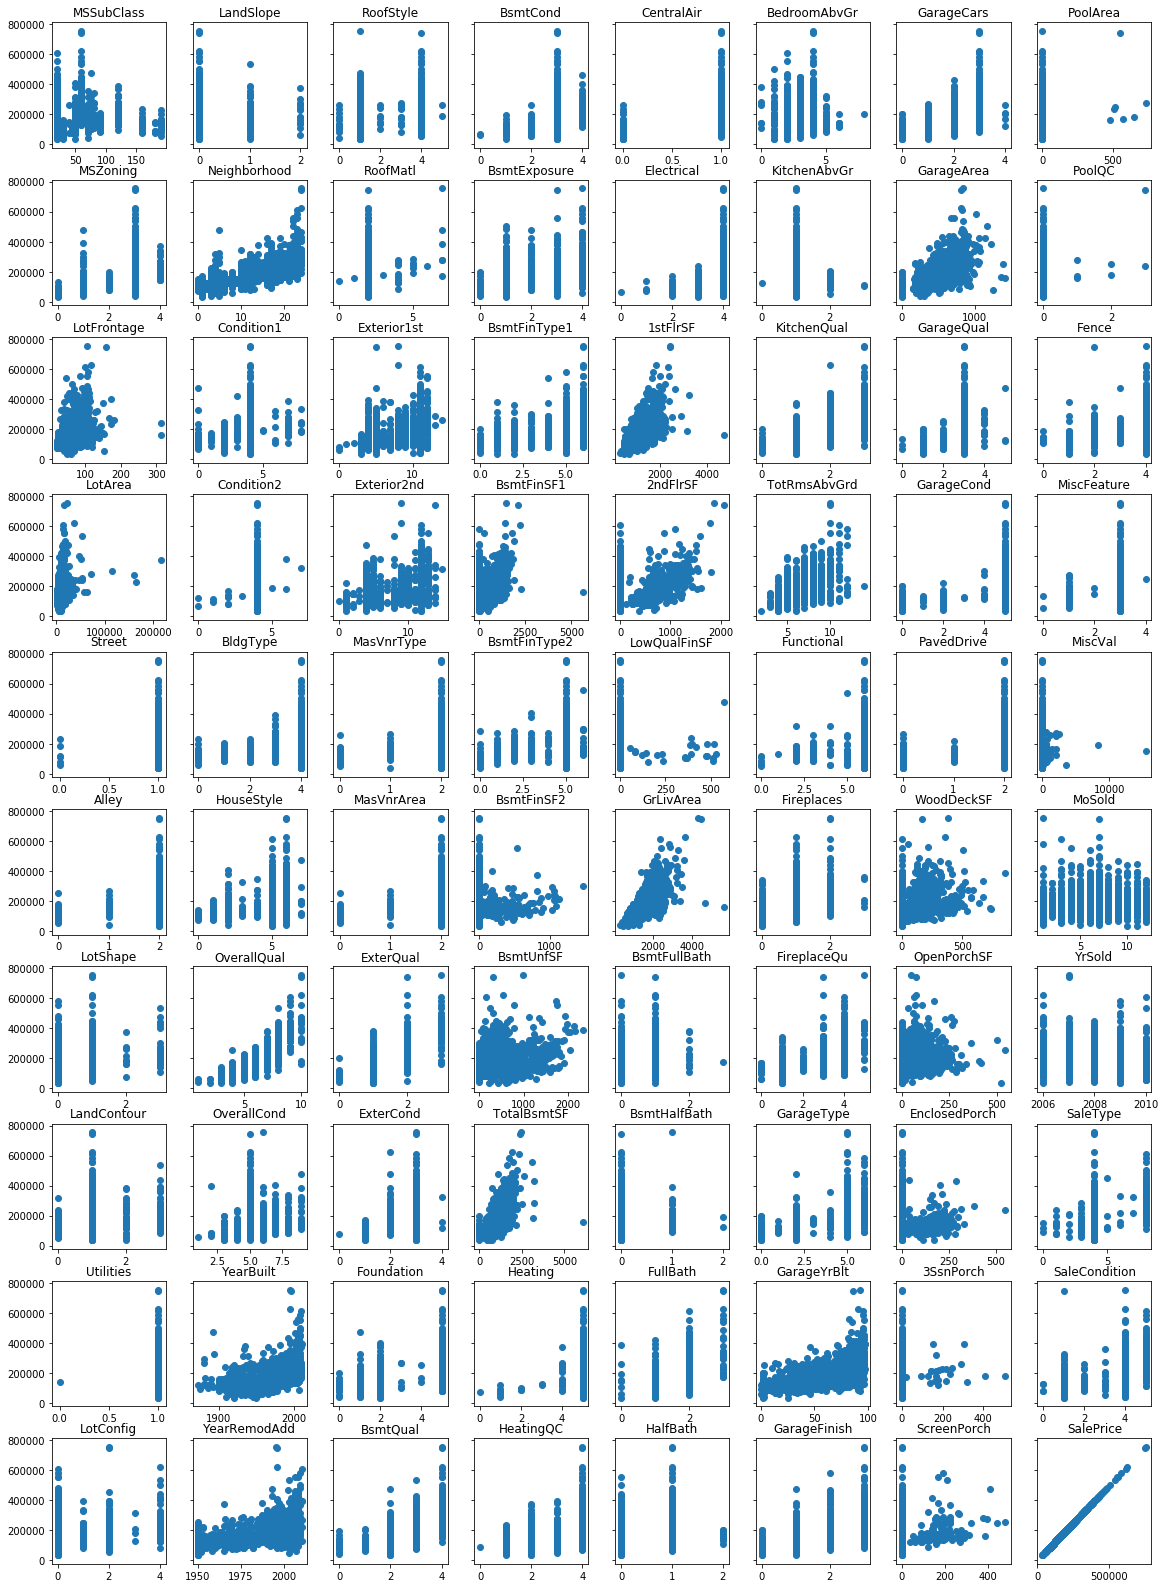

In [8]:
fig, ax = plt.subplots(10, 8, sharey=True,  figsize=(16, 22))
plt.tight_layout()

for y, row in enumerate(ax):
    for x, col in enumerate(row):
    #for column in train.columns:
        column = (train.columns[(train.columns != 'Id')])[x * 10 + y]
        col.scatter(train[column], train['SalePrice'])
        col.set_title(column)

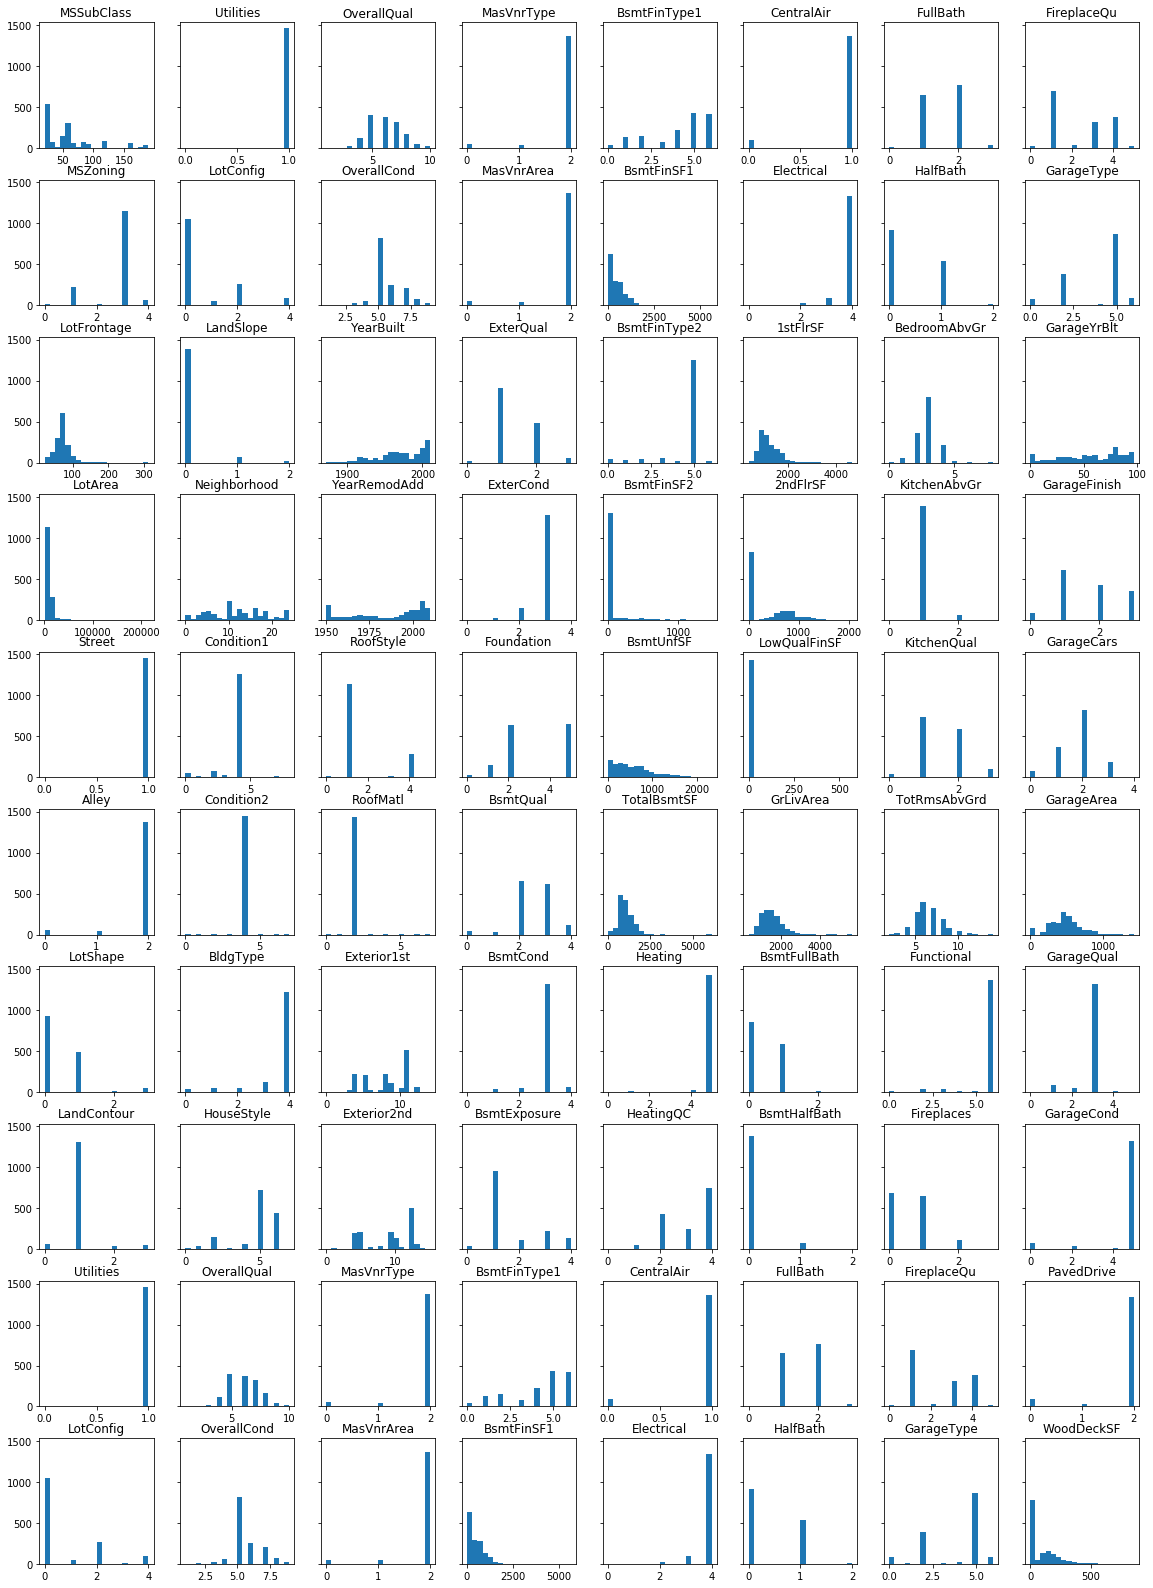

In [9]:
fig, ax = plt.subplots(10, 8, sharey=True,  figsize=(16, 22))
plt.tight_layout()

for y, row in enumerate(ax):
    for x, col in enumerate(row):
    #for column in train.columns:
        column = (train.columns[(train.columns != 'Id') & (train.columns != 'SalePrice')])[x * 8 + y]
        col.hist(train[column], bins = 20)
        col.set_title(column)

## Linear Regressor

The following section creates the training set of significant features only, using a significance level of 0.20. This was determined using the p-value for each feature from statsmodels.

In [10]:
X_train =  train.drop(['SalePrice','ExterCond','Heating', 'YearBuilt', 'Exterior1st', 'Exterior2nd', 'Foundation',
                      'BsmtFinType2', 'BsmtFinSF2', 'CentralAir', 'BsmtHalfBath', 'GarageFinish', 'PavedDrive',
                      'OpenPorchSF', 'EnclosedPorch', 'MiscVal', 'YrSold','LotShape', 'BsmtUnfSF',
                      'FireplaceQu', 'MiscFeature', 'TotalBsmtSF', 'Fence', 'GarageYrBlt','Id',
                      'BsmtFinType1', 'MSZoning', 'LandSlope', 'HalfBath', 'FullBath',
                      'GarageType', 'GarageArea', '3SsnPorch'], axis=1)

y_train = train['SalePrice']

In [11]:
# with statsmodels
X = sm.add_constant(X_train) # adding a constant
 
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_train) 
 
model.summary()

C:\Users\mkive\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                              1310.
Date:                Sat, 14 Dec 2019   Prob (F-statistic):                        0.00
Time:                        20:49:42   Log-Likelihood:                         -17135.
No. Observations:                1460   AIC:                                  3.436e+04
Df Residuals:                    1415   BIC:                                  3.460e+04
Df Model:                          45                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
MSSubClass     -247.2859     38.939     -6.351      0.000    -323.670    -170.902
LotFrontage    -139.3097     45.949     -3.032      0.002    -229.445     -49.174
LotArea           0.1712      0.096      1.792      0.073      -0.016       0.359
Street         1.846e+04   1.33e+04      1.391      0.165   -7580.362    4.45e+04
Alley          1317.2931    721.749      1.825      0.068     -98.520    2733.106
LandContour    4159.7639   1909.687      2.178      0.030     413.642    7905.886
Utilities      6.648e+04   3.07e+04      2.167      0.030    6298.196    1.27e+05
LotConfig      1211.4275    711.713      1.702      0.089    -184.699    2607.554
Neighborhood   2011.6360    200.262     10.045      0.000    1618.793    2404.479
Condition1     2078.0749    853.216      2.436      0.015     404.370    3751.780
Condition2    -8660.7583   3259.623     -2.657      0.008   -1.51e+04   -2266.545
BldgType      -6451.6717   2082.141     -3.099      0.002   -1.05e+04   -2367.256
HouseStyle     -898.1754    662.816     -1.355      0.176   -2198.383     402.032
OverallQual    9791.2259   1157.685      8.458      0.000    7520.263    1.21e+04
OverallCond    4628.5020    841.871      5.498      0.000    2977.052    6279.952
YearRemodAdd    -68.3127     20.192     -3.383      0.001    -107.922     -28.703
RoofStyle      2352.2783    726.124      3.239      0.001     927.883    3776.674
RoofMatl       8458.8767   2039.926      4.147      0.000    4457.273    1.25e+04
MasVnrType     1317.2931    721.749      1.825      0.068     -98.520    2733.106
MasVnrArea     1317.2931    721.749      1.825      0.068     -98.520    2733.106
ExterQual      1.029e+04   2466.343      4.172      0.000    5451.812    1.51e+04
BsmtQual       6845.5537   1841.102      3.718      0.000    3233.971    1.05e+04
BsmtCond      -5069.1691   2365.953     -2.143      0.032   -9710.321    -428.017
BsmtExposure   5065.2581    946.282      5.353      0.000    3208.991    6921.525
BsmtFinSF1       12.3947      2.671      4.641      0.000       7.156      17.633
HeatingQC      1344.9593   1049.922      1.281      0.200    -714.611    3404.530
Electrical    -3772.2628   2306.655     -1.635      0.102   -8297.093     752.567
1stFlrSF         24.8400      5.138      4.835      0.000      14.762      34.918
2ndFlrSF         23.5145      4.777      4.922      0.000      14.144      32.885
LowQualFinSF    -22.6692     13.165     -1.722      0.085     -48.495       3.156
GrLivArea        25.6853      4.938      5.202      0.000      15.999      35.371
BsmtFullBath   4512.6457   2127.529      2.121      0.034     339.197    8686.095
BedroomAbvGr  -4169.2805   1526.698     -2.731      0.006   -7164.114   -1174.447
KitchenAbvGr  -2.394e+04   5871.

This step fits and predicts a linear regression model using significant features, then generates a submission csv. The linear regressor produced an RMSE of 0.22857.

In [12]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

#Coefficient:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

test = removena(test)
test = encode_test()
for nacolumn in test.loc[:, test.isna().any()].columns:
    test[nacolumn].fillna(test[nacolumn].mode()[0], inplace=True)
    
y_pred = regressor.predict(test.drop(['ExterCond','Heating', 'YearBuilt', 'Exterior1st', 'Exterior2nd', 'Foundation',
                      'BsmtFinType2', 'BsmtFinSF2', 'CentralAir', 'BsmtHalfBath', 'GarageFinish', 'PavedDrive',
                      'OpenPorchSF', 'EnclosedPorch', 'MiscVal', 'YrSold','LotShape', 'BsmtUnfSF',
                      'FireplaceQu', 'MiscFeature', 'TotalBsmtSF', 'Fence', 'GarageYrBlt','Id',
                      'BsmtFinType1', 'MSZoning', 'LandSlope', 'HalfBath', 'FullBath',
                      'GarageType', 'GarageArea', '3SsnPorch'], axis=1))

submission = pd.concat([pd.Series(test.Id), pd.Series(y_pred)], axis=1)
submission.columns = ['Id', 'SalePrice']
pd.DataFrame(submission).to_csv("submission.csv", index=False)

55661.29093720041
[-2.48434887e+02 -1.40262431e+02  1.69755716e-01  1.80223168e+04
  1.31026507e+03  4.15367807e+03  6.34090334e+04  1.21708288e+03
  2.01731937e+03  2.08662493e+03 -8.83185494e+03 -6.54120891e+03
 -8.56142656e+02  9.81161161e+03  4.72444317e+03 -9.47123501e+01
  2.33056438e+03  8.39515391e+03  1.31026507e+03  1.31026507e+03
  1.03738745e+04  7.02554891e+03 -5.23947050e+03  5.07594253e+03
  1.23164127e+01  1.45373962e+03 -3.62836975e+03  2.48925385e+01
  2.35932595e+01 -2.28480719e+01  2.56377263e+01  4.55322285e+03
 -4.20376227e+03 -2.41280980e+04  9.20224710e+03  4.14332833e+03
  3.84810804e+03  3.89143724e+03  1.14380297e+04  4.32674961e+03
 -4.60533306e+03  2.16847910e+01  4.86214636e+01 -2.51148937e+02
  7.87154951e+04 -4.04714548e+02  4.02205766e+03  2.59602296e+03]


## Random Forest Regressor

Random Forest Regressor producted an RMSE of 0.14782.

In [ ]:
# Import random forest regressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train.drop(['SalePrice', 'Id'], axis=1), y_train);
# Use the forest's predict method on the test data
predictions = rf.predict(test.drop(['Id'], axis=1))

submission_rw = pd.concat([pd.Series(test.Id), pd.Series(predictions)], axis=1)
submission_rw.columns = ['Id', 'SalePrice']
submission_rw.head()
pd.DataFrame(submission_rw).to_csv("submission_rw.csv", index=False)

## Gradient Boosting Regressor

Gradient Boosting Regressor producted an RMSE of 0.13507

In [ ]:
# Import GradientBoostingRegressor

gradient_boosting_regressor = GradientBoostingRegressor(random_state = 42)
# Train the model on training data
gradient_boosting_regressor.fit(train.drop(['SalePrice', 'Id'], axis=1), y_train);
# Use the forest's predict method on the test data
predictions = gradient_boosting_regressor.predict(test.drop(['Id'], axis=1))

submission_gbf = pd.concat([pd.Series(test.Id), pd.Series(predictions)], axis=1)
submission_gbf.columns = ['Id', 'SalePrice']
submission_gbf.head()
pd.DataFrame(submission_gbf).to_csv("submission_gbf.csv", index=False)